<center><h1>ML- Portfolio</h1> </center>

<center><h2>Disha Patel</h2> </center>

<center><h3>Sales Forecasting</h3> </center>

# Table of Contents

1. [Objective](#1.-Objective)
2. [Import Required Libraries](#2.-Import-Required-Libraries)
3. [Data Profiling](#3.-Data-Profiling)  
4. [Data Cleaning](#4.-Data-Cleaning)
5. [Feature Engineering (EDA)](#5.-Feature-Engineering-(EDA))
6. [Exploratory Data Analysis (EDA)](#6.-Exploratory-Data-Analysis-(EDA))
7. [Feature Engineering (Modelling)](#7.-Feature-Engineering-(Modelling))
8. [Training Model And Evaluating](#8.-Training-Model-And-Evaluating)
9. [Interpretation of Final Model](#5.-Interpretation-of-Final-Model)
10.[Model Optimization and Next Steps](#6.-Model-Optimization-and-Next-Steps)
11.[Conclusion](#7.-Conclusion)
12.[Model Related Answer](#8.-Model-Related-Answers)

# 1. Objective 

- The objective of ML project is to develop SALES FORECASTING MODEL on the "Online Retail" dataset from the UCI Machine Learning Repository. 

- The project aims to:

    - Clean and preprocess the dataset to ensure data accuracy and completeness.

    - Explore and visualize the dataset to gain insights into sales patterns and trends.

    - Compare and select the most accurate forecasting model to make future sales predictions with high confidence.

    - Provide clear and concise interpretations of the results and insights gained from the analysis.

    - Overall, the project aims to demonstrate the value of model in sales forecasting to improve business decision-making.

## About Dataset

- Data Set Information:

    - link to dataset - https://www.kaggle.com/datasets/carrie1/ecommerce-data
        - This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



#### This dataframe contains 8 variables :
- InvoiceNo: 
    - Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: 
    - Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: 
    - Product (item) name. Nominal. 
- Quantity: 
    - The quantities of each product (item) per transaction. Numeric. 
- InvoiceDate: 
    - Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: 
    - Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: 
    - Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: 
    - Country name. Nominal, the name of the country where each customer resides.

# 2. Import Required Libraries

In [3]:
# visualization and analysis
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import calendar
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import re
import random
import plotly.offline as py
import plotly.express as px
import geopandas
import plotly.graph_objects as go
from plotly.offline import plot


## Preprocessing an ML
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
import catboost as cb
import xgboost as xgb
from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import ParameterGrid
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


# define placeholder tensor
input_tensor = tf.keras.Input(shape=(None, 10), dtype=tf.float32, name='input_tensor')

2023-08-30 20:16:04.199593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
df = pd.read_csv('E-commerce_UK_Retailer.csv', encoding='latin')

# 3. Data Profiling 

In [26]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

#### Dataset info
- Number of Observations
- Identifying missing or null values
- Identifying duplicates

In [5]:
print('no of rows in dataset: ',df.shape[0])
print('no of columns in dataset: ',df.shape[1])

no of rows in dataset:  541909
no of columns in dataset:  8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print('null values in dataset:\n', df.isnull().sum())

null values in dataset:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
print('duplicates in dataset: ', df.duplicated().sum())

duplicates in dataset:  5268


In [9]:
print('There are', df['CustomerID'].nunique(), 'Unique customers.' )
print('There are', df['StockCode'].nunique(),'Unique product (item) code.' )
print('There are', df['Country'].nunique(), 'Countries where customer resides.' )
print('There are', df['Description'].nunique(), 'Unique Product (item) name.' )
print('There are', df['InvoiceNo'].nunique(),'transaction in dataset' )
print('Start date of dataset:', df['InvoiceDate'].min() )
print('End date of dataset:', df['InvoiceDate'].max() )

There are 4372 Unique customers.
There are 4070 Unique product (item) code.
There are 38 Countries where customer resides.
There are 4223 Unique Product (item) name.
There are 25900 transaction in dataset
Start date of dataset: 1/10/2011 10:04
End date of dataset: 9/9/2011 9:52


#### We can see that there are more product item name(description) than code (stock), we can take a look later while cleaning the data
   

# 4. Data Cleaning

- Description and CustomerId 
    - Deal with Null values in description and customerid
- Delete Duplicates
- Invoiceno 
    -  Check for code 'c', it indicates a cancellations 
- StockCode 
    - Dataset info mention the code for product is assigned with 5-digit integral number, let's check for inconsistency
- Description and StockCode 
    - Analyze the imbalance of product code and product name
- InvoiceDate 
    - convert it to datetime and Check for inconsistency if any?
- UnitPrice
    - Check for any null value or 0's
- Quantity
    - Check for incosistency
- Country
    - Check if name is correct

### NULL values in customerid and description columns

In [4]:
null_percent = df.isnull().sum() / df.shape[0] * 100
null_percent 

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
df[df['Description'].isnull()]['CustomerID'].isnull().sum()

1454

In [6]:
df[df['Description'].isnull() & df['CustomerID'].isnull()]['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [7]:
df[df['Description'].isnull() & df['CustomerID'].isnull()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

#### It seems for all Null Description, CustomerId is missing and unitprice is 0.0 as well which points out record entry mistake or inconsistent
- We can drop them as there is no other way to map the Null values and it won't benifit our model

In [30]:
##cRETAING a new df to keem the original df intact incase we want to go back to original df 
df1 = df.copy()
df1 = df1.dropna(subset=['CustomerID']).reset_index(drop=True)

In [4]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### There are no more NULL values now 

### Removing Duplicates

In [5]:
df1.shape

(406829, 8)

In [31]:
df1 = df1.drop_duplicates()
df1.shape

(401604, 8)

### Invoiceno 
- Check for 'c' for cancellations

In [7]:
cancelled_orders = df1[df1['InvoiceNo'].str.startswith('C')]
print('there are', len(cancelled_orders), 'cancelled orders')
print(round(len(cancelled_orders)/ df1.shape[0] * 100,2),'%', 'Cancelled Orders from dataset')

there are 8872 cancelled orders
2.21 % Cancelled Orders from dataset


In [13]:
#lets check quantitty of those cancelled orders 
print('No.of rows with quantity less than or equal to zero:',len(cancelled_orders[cancelled_orders['Quantity'] <= 0 ]))

No.of rows with quantity less than or equal to zero: 8872


In [32]:
df1.drop(df1[df1['InvoiceNo'].str.startswith('C')].index, inplace=True)

In [33]:
df1.shape

(392732, 8)

### StockCode
- Lets check with code less than or more than 5 digit-number

In [16]:
print('StockCode with more than 5 digit number: ',len(df1[(df1['StockCode'].str.len())>5]))
print('StockCode with less than 5 digit number: ',len(df1[(df1['StockCode'].str.len())<5]))

StockCode with more than 5 digit number:  32886
StockCode with less than 5 digit number:  1537


In [17]:
code_less_five = df1[(df1['StockCode'].str.len())<5]
code_less_five['StockCode'].value_counts()

POST    1099
M        285
C2       133
DOT       16
PADS       4
Name: StockCode, dtype: int64

In [18]:
code_less_five[code_less_five['StockCode'] == 'PADS']

InvoiceNo StockCode                 Description  Quantity  \
110121    550193      PADS  PADS TO MATCH ALL CUSHIONS         1   
199246    561226      PADS  PADS TO MATCH ALL CUSHIONS         1   
262429    568158      PADS  PADS TO MATCH ALL CUSHIONS         1   
263645    568200      PADS  PADS TO MATCH ALL CUSHIONS         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
110121   4/15/2011 9:27      0.001     13952.0  United Kingdom  
199246  7/26/2011 10:13      0.001     15618.0  United Kingdom  
262429  9/25/2011 12:22      0.000     16133.0  United Kingdom  
263645  9/25/2011 14:58      0.001     16198.0  United Kingdom

##### We can see that the stock code less than 5 related to the description of the product

- POST -> POSTAGE
- M    -> Manual
- C2   -> CARRIAGE
- D    -> Discount     
- DOT  -> DOTCOM POSTAGE
- CRUK -> CRUK Commission
- PADS -> PADS TO MATCH ALL CUSHIONS

In [34]:
df1.drop(df1.loc[df1['StockCode'].str.len() < 5].index, inplace=True)

In [35]:
len(df1[(df1['StockCode'].str.len())<5])

0

In [36]:
# check if values in Stockcode contain only alphabetical characters
len(df1[df1['StockCode'].str.contains(r'^[A-Z ]+$')])

12

In [37]:
df1.drop(df1.loc[df1['StockCode'].str.contains(r'^[A-Z ]+$')].index, inplace=True)

#####  Dropped the codes with less than 5 digit number code as they seem to be shipping, discount, port charges or bank charges.

##### Lets check for StockCodes with more than 5- digit number 

In [23]:
code_more_five = df1[(df1['StockCode'].str.len())>5]
code_more_five
last_digit = code_more_five['StockCode'].str[-1]
last_code_counts = last_digit.value_counts()
print(last_code_counts.sum())
last_code_counts.sort_index()

32874


A    8245
B    8834
C    4009
D    2289
E    1514
F    1330
G    1053
H     209
I       3
J     133
K     317
L    1953
M     300
N     436
O       1
P     609
R      68
S    1240
T       5
U     164
V      37
W     121
Y       3
Z       1
Name: StockCode, dtype: int64

### StockCode and Description
- Number of unique items for StockCode and Description is different indicating one-to-many relationship.
    - Less product code than product name 
    - could be data entry mistake in name?

In [24]:
print('Unique StockCode:', df1['StockCode'].nunique())
print('Unique product name',df1['Description'].nunique())

Unique StockCode: 3659
Unique product name 3871


In [25]:
# Converting "Description" to a string type series and removing extra whitespaces
df1['Description'] = df1['Description'].astype('str')
df1['Description'] = df1['Description'].str.strip()

In [26]:
df1['Description'] = df1['Description'].apply(lambda x: ''.join([char for char in str(x).lower() if char not in ',.!!@#$%^&*()']))

In [27]:
# A new dataframe with unique StockCode-Description pairs
products = df1[['StockCode', 'Description']].drop_duplicates()

# A new dataframe with the count of each StockCode
stockCount = products['StockCode'].value_counts().to_frame()

# List of StockCode with more than 1 Description
stockList = stockCount[stockCount['StockCode'] > 1].index

# Filter the products dataframe to only include StockCodes in stockList
products_filtered = products[products['StockCode'].isin(stockList)]

print(len(products_filtered))
products_filtered.sort_values(by='StockCode').head(20)

421


StockCode                          Description
254109    17107D    flower fairy 5 summer draw liners
4376      17107D   flower fairy5 summer b'draw liners
230355    17107D         flower fairy 5 drawer liners
19402      20622                    vippassport cover
178279     20622                   vip passport cover
36309      20725                 lunch bag red spotty
93         20725              lunch bag red retrospot
36298      20914     set/5 red spotty lid glass bowls
415        20914  set/5 red retrospot lid glass bowls
379954     21175        gin and tonic diet metal sign
119        21175          gin + tonic diet metal sign
307        21232       strawberry ceramic trinket box
312267     21232       strawberry ceramic trinket pot
336539     21243                  pink polkadot plate
554        21243                 pink  polkadot plate
504        21811    christmas hanging heart with bell
59541      21811              hanging heart with bell
50343      21818             glitter heart decoration
1623       21818              glitter christmas heart
3060       21899               key fob  garage design

#### CustomerID
- Adding c infront of the ID to make sure it's not treated like a float/int

In [38]:
df1['CustomerID'] = 'C' + df1['CustomerID'].astype('int').astype('str')
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55     C17850  United Kingdom  
1  12/1/2010 8:26       3.39     C17850  United Kingdom  
2  12/1/2010 8:26       2.75     C17850  United Kingdom  
3  12/1/2010 8:26       3.39     C17850  United Kingdom  
4  12/1/2010 8:26       3.39     C17850  United Kingdom

### InvoiceDate
- Changing the datatype

In [39]:
# converting the date column to datetime format
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [16]:
print('Start date of dataset:', df1['InvoiceDate'].min() )
print('End date of dataset:', df1['InvoiceDate'].max() )

Start date of dataset: 2010-12-01 08:26:00
End date of dataset: 2011-12-09 12:50:00


#### Dataset contains data from 1st dec 2010 to 9th dec 2011

### UnitPrice
- Checking if there are any negative or 0 unitprice 

In [40]:
# checking for unitprice less than or equaal to 0
len(df1[df1['UnitPrice'] <= 0])

33

In [41]:
## There are 33 rows with 0 as unitprice it could be special gift or something we can remove them 
df1.drop(df1[df1['UnitPrice'] <= 0].index, inplace=True)

In [42]:
df1.shape

(391150, 8)

In [34]:
## Lets check for outliers
df1['UnitPrice'].describe()

count    391150.000000
mean          2.874372
std           4.284738
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

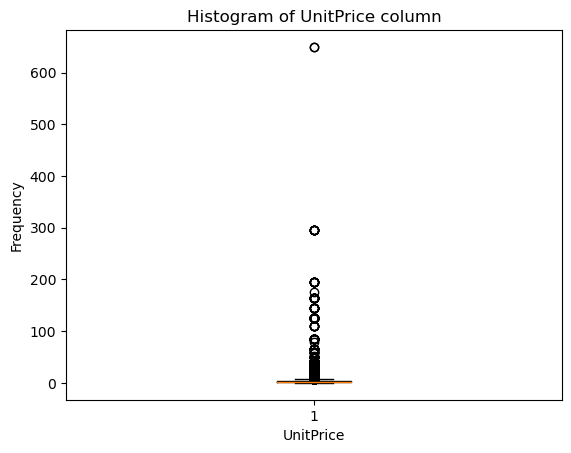

In [35]:
# creating a histogram of the 'UnitPrice' column
plt.boxplot(df1['UnitPrice'])
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Histogram of UnitPrice column')
plt.show()

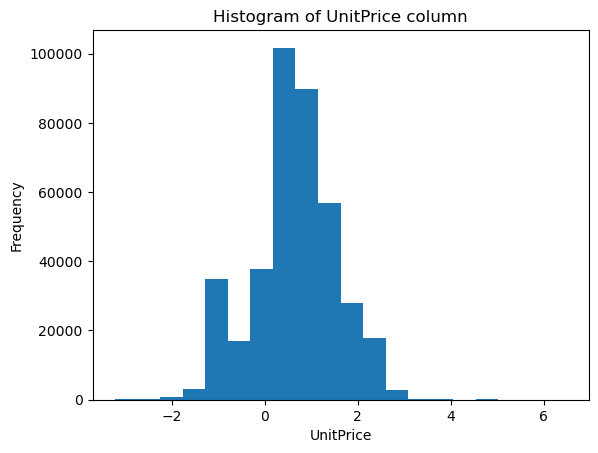

In [36]:
# creating a histogram of the 'UnitPrice' column
plt.hist(np.log(df1['UnitPrice']), bins = 20)
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Histogram of UnitPrice column')
plt.show()

In [37]:
np.quantile(df1['UnitPrice'], 0.95)

8.5

In [43]:
unitp_outliers = df1[df1['UnitPrice'] > np.quantile(df1['UnitPrice'], 0.95)]
percent_lost_unit = len(unitp_outliers) / len(df1) * 100
print('we can remove',round(percent_lost_unit,2),'% of data which are outliers')

we can remove 4.03 % of data which are outliers


In [44]:
## Keeping some extra than 95% 
df1 = df1.loc[df1['UnitPrice'] < 25]

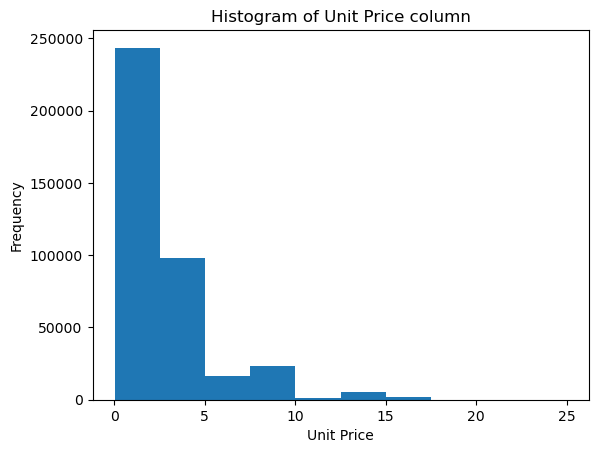

In [40]:
# creating a histogram of the 'Quantity' column after removing outliers
plt.hist(df1['UnitPrice'], bins = 10)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Price column')
plt.show()

#### UnitPrice: summary
- same item has different prices. 
- while feature enginnering we can count TotalPrice and drop UnitPrice. 
- While aggregating we will calculate the UnitPrice from TotalPrice and Quantity for each item and month again

### Quantity


In [42]:
df1['Quantity'].describe()

count    390628.000000
mean         13.160014
std         180.928066
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

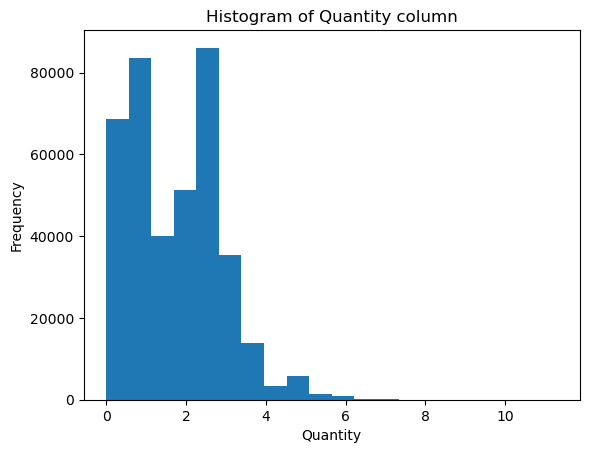

In [43]:
# creating a histogram of the 'Quantity' column
plt.hist(np.log(df1['Quantity']), bins = 20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity column')
plt.show()

Quantity      UnitPrice
count  388124.000000  388124.000000
mean       10.444595       2.798247
std        16.628556       2.740372
min         1.000000       0.040000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max       176.000000      24.960000

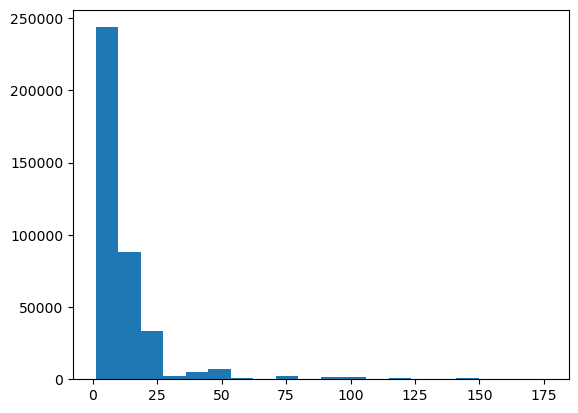

In [44]:
q1 = df1['Quantity'].quantile(0.025)
q3 = df1['Quantity'].quantile(0.975)
iqr = q3 - q1

# defining the lower and upper bounds for the middle 95% of the data
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# identify the data within the middle 95% of the distribution
out = df1[(df1['Quantity'] < lower_bound) | (df1['Quantity'] > upper_bound)]
middle_data = df1[(df1['Quantity'] >= lower_bound) & (df1['Quantity'] <= upper_bound)]
plt.hist(middle_data['Quantity'], bins = 20);
middle_data.describe()

In [22]:
np.quantile(df1['Quantity'], 0.95) 

40.0

In [45]:
outliers = df1[df1['Quantity'] > np.quantile(df1['Quantity'], 0.95)]
percent_lost = len(outliers) / len(df1) * 100
print('we can remove',round(percent_lost,2),'% of data which are outliers')

we can remove 4.75 % of data which are outliers


In [46]:
## Removing outliers ans keeping little more data than 95%
actual_percent_lost = len([df1['Quantity'] < 60]) / len(df1) * 100
print(round(actual_percent_lost,4),'%')
df1 = df1.loc[df1['Quantity'] < 40]

0.0003 %


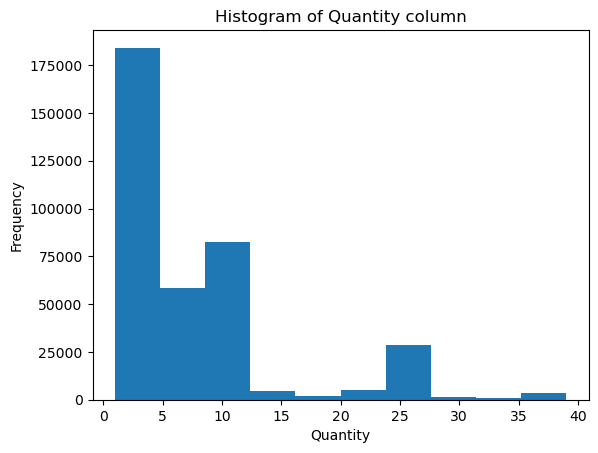

In [22]:
# creating a histogram of the 'Quantity' column after removing outliers
plt.hist(df1['Quantity'], bins = 10)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity column')
plt.show()

### Country

In [23]:
df1['Country'].value_counts()

United Kingdom          333298
Germany                   8284
France                    7672
EIRE                      6429
Spain                     2334
Belgium                   1871
Switzerland               1686
Portugal                  1370
Norway                     923
Netherlands                822
Italy                      725
Channel Islands            717
Australia                  625
Finland                    592
Cyprus                     567
Austria                    377
Denmark                    331
Poland                     314
Sweden                     266
Unspecified                241
Israel                     224
Iceland                    180
USA                        173
Singapore                  169
Canada                     146
Japan                      143
Greece                     139
Malta                      107
United Arab Emirates        65
European Community          57
RSA                         57
Lebanon                     45
Lithuani

In [48]:
## Keeping for now will decide to drop them or not after baseline model
df1[df1['Country'].isin(['Unspecified','European Community'])]

InvoiceNo StockCode                         Description  Quantity  \
105769    549687     20685               DOORMAT RED RETROSPOT         2   
105770    549687     22691             DOORMAT WELCOME SUNRISE         2   
105771    549687     48116          DOORMAT MULTICOLOUR STRIPE         2   
105772    549687     21213         PACK OF 72 SKULL CAKE CASES        24   
105773    549687     21977  PACK OF 60 PINK PAISLEY CAKE CASES        24   
...          ...       ...                                 ...       ...   
223981    564051     23007              SPACEBOY BABY GIFT SET         1   
223982    564051     21833                CAMOUFLAGE LED TORCH        12   
223983    564051     23081       GREEN METAL BOX ARMY SUPPLIES         2   
223984    564051     23046   PAPER LANTERN 9 POINT DELUXE STAR         2   
223985    564051     23045    PAPER LANTERN 5 POINT STAR MOON          4   

               InvoiceDate  UnitPrice CustomerID      Country  
105769 2011-04-11 13:29:00       7.95     C12363  Unspecified  
105770 2011-04-11 13:29:00       7.95     C12363  Unspecified  
105771 2011-04-11 13:29:00       7.95     C12363  Unspecified  
105772 2011-04-11 13:29:00       0.55     C12363  Unspecified  
105773 2011-04-11 13:29:00       0.55     C12363  Unspecified  
...                    ...        ...        ...          ...  
223981 2011-08-22 13:32:00      16.95     C14265  Unspecified  
223982 2011-08-22 13:32:00       1.69     C14265  Unspecified  
223983 2011-08-22 13:32:00       8.25     C14265  Unspecified  
223984 2011-08-22 13:32:00       6.65     C14265  Unspecified  
223985 2011-08-22 13:32:00       4.15     C14265  Unspecified  

[298 rows x 8 columns]

In [47]:
# Loading file for plotting on world map 
# there are some countries with different spelling this will help plot the world data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [49]:
# Match country names in df dataset and world dataframe
Countries = pd.DataFrame(df1['Country'].unique(),columns=['Country'])
Countries[~Countries['Country'].isin(list(world.name))]

Country
5                 EIRE
14     Channel Islands
23           Singapore
28      Czech Republic
30         Unspecified
32                 USA
33  European Community
34             Bahrain
35               Malta
36                 RSA

In [27]:
world[world['name'] == 'Malaysia']

pop_est continent      name iso_a3  gdp_md_est  \
148  31949777.0      Asia  Malaysia    MYS      364681   

                                              geometry  
148  MULTIPOLYGON (((100.08576 6.46449, 100.25960 6...

In [50]:
# Syncing country names in dataframe and world datasets
df1['Country'].replace(to_replace={'EIRE':'Ireland','Channel Islands':'United Kingdom','Czech Republic':'Czech Rep.',
                       'RSA':'South Africa','Bahrain':'Saudi Arabia','Malta':'Italy'},inplace=True)
world.name.replace(to_replace={'Malaysia':'Singapore','United States of America':'USA'},inplace=True)

In [51]:
df1.shape

(371059, 8)

In [ ]:
# Making a copy to preserve data integrity, aid debugging without having altering df1
df2 = df1.copy()

# 5. Feature Engineering (EDA)

###  Only for EDA purpose 
As when dealing with timeseries data the data should be aggregated by date to avoid any duplicate dates and it can give us a window of total sales for that date/period 

- Creating all date time features - year, month, day, time 
    - these can help the model identify seasonal and cyclical patterns (time based).
- Ceating Price (UnitPrice * Quantity)
- Creating Binary (0,1) internatiton column for sales outside of UK 

### Creating Year, Month, Day ,Time column from invoiceDate

In [54]:
## Creating extra features to check if there is any correlation and for EDA purporse 
## We can always drop the unwanted feature after our baseline model

df2['Year'] = df2['InvoiceDate'].dt.year
df2['Quarter'] = df2['InvoiceDate'].dt.quarter ## extra for EDA
df2['Month'] = df2['InvoiceDate'].dt.month
df2['Week'] = df2['InvoiceDate'].dt.isocalendar().week ## week number of the year
df2['Weekday'] = df2['InvoiceDate'].dt.weekday ##  the day of the week as an integer, where Monday is 0 and Sunday is 6
df2['Day'] = df2['InvoiceDate'].dt.day ## day of the month as an integer
df2['Dayofyear'] = df2['InvoiceDate'].dt.dayofyear
df2['Hour'] = df2['InvoiceDate'].dt.hour

In [55]:
# Adding column for total Price for each product in each order
df2['TotalPrice'] = df2['Quantity'] * df2['UnitPrice']

In [56]:
# Adding new Binary column 'Orders' 0 for United Kingdom, and 1 for other countries
df2['InternationalOrder'] = (df2['Country'] != 'United Kingdom').astype('int')

In [57]:
df2.shape

(371059, 18)

# 6. Exploratory Data Analysis (EDA)

####  Possible analysis from this Data adn what useful insight business can get to improve the overall sales / cutomer service
- Sales Analysis: 
    - Analyze sales trends, popular products, top customers, and revenue over time
        - To optimize/improve inventory and production.
    
- Customer analysis: 
    - we can use CustomerID column to segment customers based on their buying behavior, purchase frequency, and total spendding
        - Helps enhaning marketing campaigns for specific group of customers and improve customer retention.

- Time-series analysis: 
    - We can use the InvoiceDate column to perform time-series analysis and identify seasonal trends, and other patterns in the data
        - Helps in Adjusting/Decide pricing and promotions according to trend or seasn.
    
- International orders analysis: 
    - We can use the InternationalOrder column to analyze the proportion of international orders
        - Help to promote acoordinly to improve sales as well as enhance shipping and logistics to improve profitability and gain customers on large scale

- Product analysis: 
    - We can use the Description/Product column to perform text analysis and identify popular keywords, trends in product descriptions and sentiment analysis
        - Helps improce product listings and marketing content.

<AxesSubplot:>

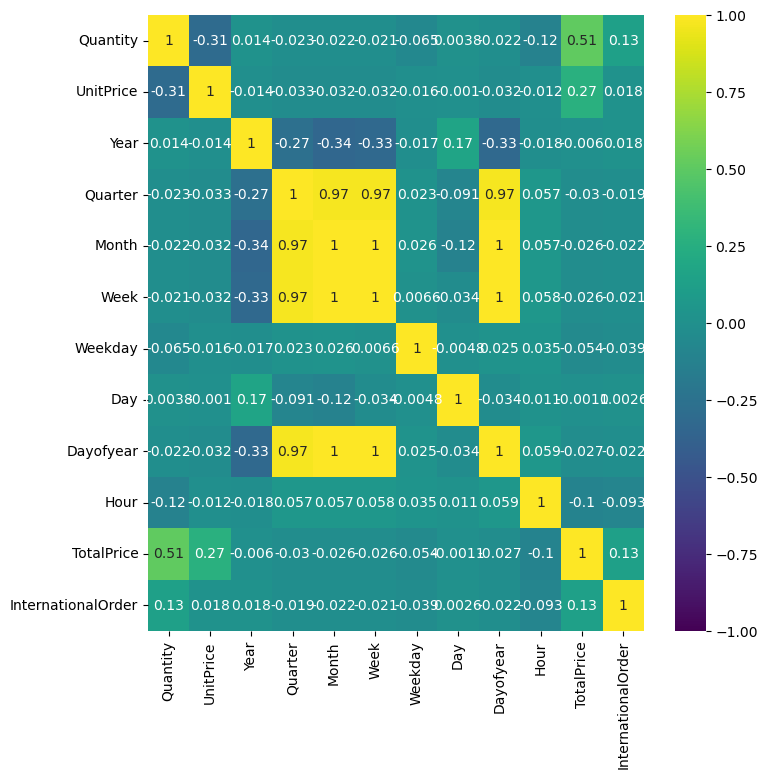

In [405]:
corr = df2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="viridis",vmin=-1,vmax=1,center=0)

In [189]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379120 entries, 0 to 379119
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           379120 non-null  object        
 1   StockCode           379120 non-null  object        
 2   Description         379120 non-null  object        
 3   Quantity            379120 non-null  int64         
 4   InvoiceDate         379120 non-null  datetime64[ns]
 5   UnitPrice           379120 non-null  float64       
 6   CustomerID          379120 non-null  object        
 7   Country             379120 non-null  object        
 8   Year                379120 non-null  int64         
 9   Quarter             379120 non-null  int64         
 10  Month               379120 non-null  int64         
 11  Week                379120 non-null  UInt32        
 12  Weekday             379120 non-null  int64         
 13  Day                 379120 no

### Time Series Sales Analysis
#### Total Sales by :- 
- Day of year
- Week of year
- Month
- Day of month
- Weekday
- Hour

In [58]:
day_year_sales = go.Scatter(x=list(df2.groupby('Dayofyear').groups.keys()), y=df2.groupby('Dayofyear')['TotalPrice'].sum())
layout = go.Layout(title='Total sales for year "day"', xaxis=dict(title='Day of year'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[day_year_sales], layout=layout)
fig.show()

In [218]:
week_year_sales = go.Scatter(x=list(df2.groupby('Week').groups.keys()), y=df2.groupby('Week')['TotalPrice'].sum())
layout = go.Layout(title='Total sales for year "weekly"', xaxis=dict(title='week"yearly"'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[week_year_sales], layout=layout)
fig.show()

In [215]:
monthy_sales = go.Scatter(x=list(df2.groupby('Month').groups.keys()), y=df2.groupby('Month')['TotalPrice'].sum())
layout = go.Layout(title='Monthly Sales', xaxis=dict(title='Month'), yaxis=dict(title='Total Price'))
fig = go.Figure(data=[monthy_sales], layout=layout)
fig.show()

In [214]:
day_monthly_sales = go.Scatter(x=list(df2.groupby('Day').groups.keys()), y=df2.groupby('Day')['TotalPrice'].sum())
layout = go.Layout(title='Date (day of month) Sales', xaxis=dict(title='Day'), yaxis=dict(title='Total Price'))
fig = go.Figure(data=[day_monthly_sales], layout=layout)
fig.show()

In [259]:
weekday_sales = go.Scatter(x=list(df2.groupby('Weekday').groups.keys()), y=df2.groupby('Weekday')['TotalPrice'].sum())
layout = go.Layout(title='Weekday Sales', xaxis=dict(title='Weekday'), yaxis=dict(title='Total sales'))
fig = go.Figure(data=[weekday_sales], layout=layout)
fig.show()

In [245]:
hourly_sales = go.Scatter(x=list(df2.groupby('Hour').groups.keys()), y=df2.groupby('Hour')['TotalPrice'].sum())
layout = go.Layout(title='Hourly Sales', xaxis=dict(title='Hour'), yaxis=dict(title='Total Price'))
fig = go.Figure(data=[hourly_sales], layout=layout)
fig.show()

### Lets check no. of quantity based on months to check trend 

In [246]:
monthly_quantity = go.Scatter(x=list(df2.groupby('Month').groups.keys()), y=df2.groupby('Hour')['Quantity'].sum())
layout = go.Layout(title='monthly quantity', xaxis=dict(title='Month'), yaxis=dict(title='Total Quantity'))
fig = go.Figure(data=[monthly_quantity], layout=layout)
fig.show()

### Top-selling products

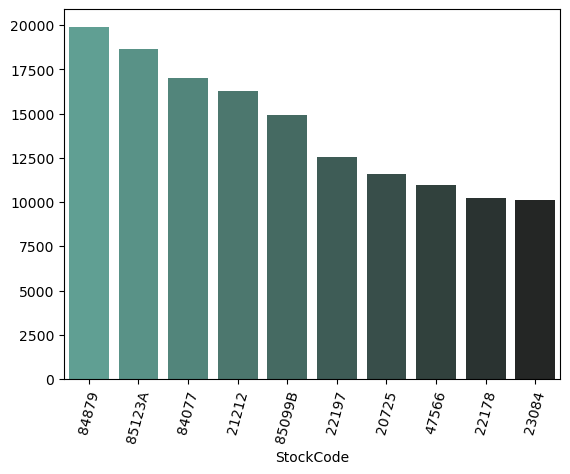

In [236]:
# Top-selling products
top_products = df2.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.index, y=top_products.values, palette="dark:#5A9_r")
plt.xticks(rotation =75)
plt.show()

### Analyzing sales by country

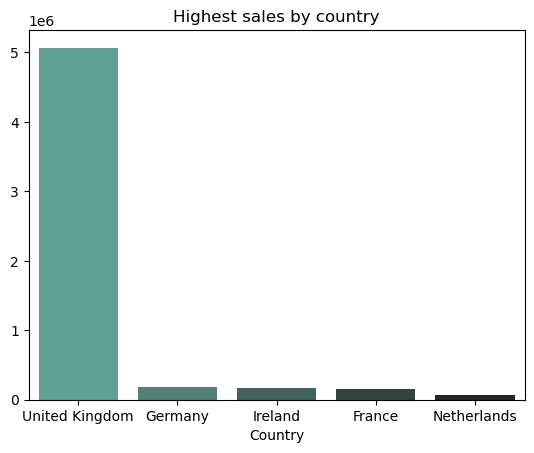

In [262]:
# Analyze sales by country
sales_by_country = df2.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_country.index[:5], y=sales_by_country.values[:5], palette="dark:#5A9_r")
plt.title('Highest sales by country')
plt.xlabel('Country')
plt.show()

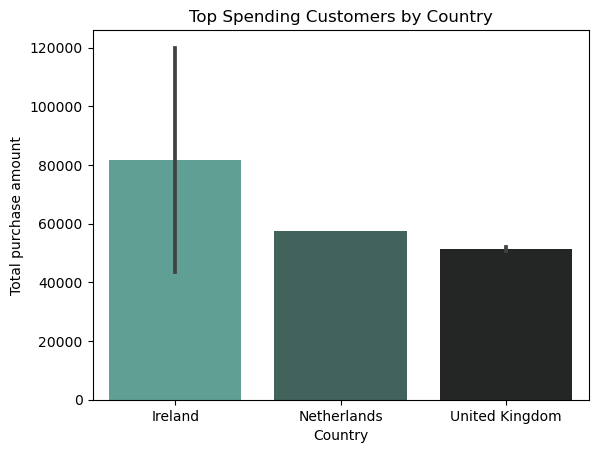

In [266]:
# Grouping the data by customer ID and country, and sum the total amount spent on purchases by each customer in each country
highest_purchase = df2.groupby(['CustomerID', 'Country'])['TotalPrice'].sum().sort_values(ascending=False)
sns.barplot(x=highest_purchase[:5].index.get_level_values('Country'), y=highest_purchase[:5].values, palette="dark:#5A9_r")
plt.title('Top Spending Customers by Country')
plt.xlabel('Country')
plt.ylabel('Total purchase amount')
plt.show()

### Summary of EDA 
- Somehow the sale in november is highest from whole year
    - could be due to thanksgiving shopping or christmas gifts
        - could help business to attarct more customers by focusing on marketing startegies
        
- people tend to but more in the first 10 days of month and the sales is gradually descresing at the edn of the month
    - this could be due to the timing of paychecks
        - Businesses can use this insight by offering promos or deals towards the end of the month to attract more customers to make additional purchases.
        
- The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward
    - could be people away due to weekend
- The company receives the highest number of orders at 12:00pm
    - Possibly most customers made purchases during lunch hour between 12:00pm - 2:00pm
- customer with the highest money spent on purchases comes from Irelands
- customer with the highest sales comes from the UK

# 7. Feature Engineering (Modelling)

- For modeling based on time (future prediction) 
    - Creating a new df which has the dataset aggregated( grouped by invoicedate and stockcode to make it as unique identifier)
        - This would give a unique data point for each combination of date and stock code, which could be useful if we want to analyze sales trends or patterns for specific products over time.
    - Creating all date time features from aggregated df - year, month, day, time 
        - these can help the model identify seasonal and cyclical patterns of sales 

In [75]:
df1.drop(['InvoiceNo', 'CustomerID','Description'],axis=1,inplace=True)

In [76]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# removing the minutes part of datetime object
df1['InvoiceDate'] = df1['InvoiceDate'].dt.date

In [77]:
sales_df = df1.copy()

In [78]:
sales_df = sales_df.groupby(['InvoiceDate','StockCode','Country'],as_index=False).sum()
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

In [79]:
sales_df['Year'] = sales_df['InvoiceDate'].dt.year
sales_df['Quarter'] = sales_df['InvoiceDate'].dt.quarter
sales_df['Month'] = sales_df['InvoiceDate'].dt.month
sales_df['Week'] = sales_df['InvoiceDate'].dt.isocalendar().week
sales_df['Weekday'] = sales_df['InvoiceDate'].dt.weekday
sales_df['Day'] = sales_df['InvoiceDate'].dt.day
sales_df['Dayofyear'] = sales_df['InvoiceDate'].dt.dayofyear

In [80]:
sales_df.tail()

InvoiceDate StockCode         Country  Quantity  UnitPrice  Year  \
235097  2011-12-09    85071C  United Kingdom         1       0.39  2011   
235098  2011-12-09    85099B  United Kingdom        10       2.08  2011   
235099  2011-12-09    85099C  United Kingdom        10       1.79  2011   
235100  2011-12-09    85123A  United Kingdom         1       2.95  2011   
235101  2011-12-09     85173  United Kingdom        12       0.79  2011   

        Quarter  Month  Week  Weekday  Day  Dayofyear  
235097        4     12    49        4    9        343  
235098        4     12    49        4    9        343  
235099        4     12    49        4    9        343  
235100        4     12    49        4    9        343  
235101        4     12    49        4    9        343

In [79]:
## Converting it to csv to save the cleaned data, eliminating the need to rerun the entire data cleaning process when continuing the project.
sales_df.to_csv('sales_forecasting_time_series_modelling.csv', index=False)

In [81]:
sales_df.sort_values(by='InvoiceDate').reset_index(drop=True)

InvoiceDate StockCode         Country  Quantity  UnitPrice  Year  \
0       2010-12-01     10002  United Kingdom        12       0.85  2010   
1       2010-12-01     22730  United Kingdom        18      15.00  2010   
2       2010-12-01     22731  United Kingdom         6       5.00  2010   
3       2010-12-01     22735  United Kingdom         2       1.65  2010   
4       2010-12-01     22736  United Kingdom        13       3.30  2010   
...            ...       ...             ...       ...        ...   ...   
235097  2011-12-09     22328         Germany        12       5.90  2011   
235098  2011-12-09     22326         Germany        18       8.85  2011   
235099  2011-12-09     22314  United Kingdom        24       1.25  2011   
235100  2011-12-09     22411  United Kingdom        20       3.87  2011   
235101  2011-12-09     85173  United Kingdom        12       0.79  2011   

        Quarter  Month  Week  Weekday  Day  Dayofyear  
0             4     12    48        2    1        335  
1             4     12    48        2    1        335  
2             4     12    48        2    1        335  
3             4     12    48        2    1        335  
4             4     12    48        2    1        335  
...         ...    ...   ...      ...  ...        ...  
235097        4     12    49        4    9        343  
235098        4     12    49        4    9        343  
235099        4     12    49        4    9        343  
235100        4     12    49        4    9        343  
235101        4     12    49        4    9        343  

[235102 rows x 12 columns]

# 8. Training Model And Evaluating
- Model Selection
- Parameter tuning
- Model stacking
- Model selection
- Model interpretation

## Contents:

1. [Models](#1.-Models)           
    A. [Linear Regression](#A.-Linear-Regression)    
    B. [XGBoost](#B.-XGBoost)  
    C. [CatBoost](#C.-CatBoost)     
    D. [Baseline Model Metric Evaluation](#D.-Baseline-Model-Metric-Evaluation)
2. [Hyperparameter](#2.-Hyperparameter)  
3. [Stacking](#3.-Stacking)
4. [LSTM](#4.-LSTM)
5. [Interpretation of Final Model](#5.-Interpretation-of-Final-Model)
6. [Model Optimization and Next Steps](#6.-Model-Optimization-and-Next-Steps)
7. [Conclusion](#7.-Conclusion)
8. [Model Related Answer](#8.-Model-Related-Answers)

## TimeSeriesSplit - how does it work

- TimeSeriesSplit reference:
    - https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9
    - https://www.kaggle.com/code/tomwarrens/timeseriessplit-how-to-use-it/notebook
    -https://forecastegy.com/posts/multiple-time-series-forecasting-with-scikit-learn/

    
- Steps
     - Prepare data frame for time-series split
     - Set the data frame index to be time if it is not so.
     - Sort time frame by time
     - prepare features dataframe (X) and target (y) as data series


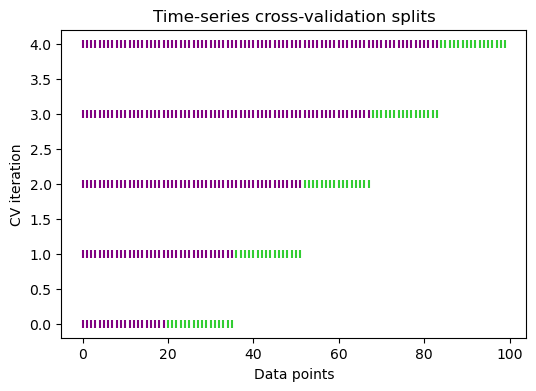

In [52]:
from sklearn.model_selection import TimeSeriesSplit

# Creating some dummy data
X = np.random.randn(100, 10)
y = np.random.choice([0, 1], size=100)

# Creating a time-series cross-validation object
tscv = TimeSeriesSplit(n_splits=5)

# Creating a time-series Hold-Out validation object
# tscv2 = TimeSeriesSplit(n_splits=2)

## Ploting to see how does TimeSeriesSplit works
plt.figure(figsize=(6, 4))
for ii, (train_index, test_index) in enumerate(tscv.split(X)):
    plt.scatter(train_index, [ii] * len(train_index), marker='|', color='Purple')
    plt.scatter(test_index, [ii] * len(test_index), marker='|', color='limegreen')   
plt.xlabel('Data points')
plt.ylabel('CV iteration')
plt.title('Time-series cross-validation splits')
plt.show()


- mlforecast
    - mlforecast is a framework to perform time series forecasting using machine learning models

## Split the dataset into train and test dataset

In [82]:
sales_df.columns
## drOPPING invoicedat,stockcode,year
sales_df.drop(['StockCode','Year'],axis=1,inplace=True)

In [115]:
# Spliting the dataset into train, val and test dataset

df_train = sales_df.loc[sales_df['InvoiceDate']<'2011-08-01']
df_val = sales_df.loc[(sales_df['InvoiceDate']>='2011-08-01') & (sales_df['InvoiceDate'] <'2011-10-01')]
df_test = sales_df.loc[sales_df['InvoiceDate']>='2011-10-01']

In [116]:
# Preparing the data
X_train, y_train = df_train.drop(['InvoiceDate','Quantity','Dayofyear'], axis=1), df_train['Quantity']
X_val, y_val = df_val.drop(['InvoiceDate','Quantity','Dayofyear'], axis=1), df_val['Quantity']
X_test, y_test = df_test.drop(['InvoiceDate','Quantity','Dayofyear'], axis=1), df_test['Quantity']

In [117]:
X_val.shape

(40868, 7)

# 1. Models


### Pipeline for preprocessing and model 

In [121]:
## using Target Encoder for columns which has more unique values
target_pipeline = Pipeline([
    ('t_enc',TargetEncoder())
])

## For Non-Categorical Data
num_pipeline = Pipeline([
    ('no','passthrough')
])

## prepocessing pipeline that transformers column before fitting into model 
preprocessor = ColumnTransformer(
    transformers=[
        ('target',target_pipeline,['Country','Quarter','Month',
                                   'Week','Weekday','Day']),
        ('num',num_pipeline,['UnitPrice'])
    ])

# A. Linear Regression 

In [99]:
## Model pipeline that works on training set and perfrom the steps mentioned in pipeline in order
pipe_lr = Pipeline(steps=[
    ('encoding',preprocessor),
    ('scaler',MinMaxScaler()),
    ('lr',LinearRegression()),
])

In [100]:
## fit pipeline on val set
pipe_lr.fit(X_train,y_train)
y_pred_lr = pipe_lr.predict(X_val)

val_mse = mean_squared_error(y_val, y_pred_lr)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_lr)

## fit pipeline on train set
y_train_pred_lr = pipe_lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred_lr)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred_lr)


## Bias check
print("Train MSE: {:.3f}".format(train_mse))
print("Train RMSE: {:.3f}".format(train_rmse))
print("Train MAE: {:.3f}".format(train_mae))
print("Val MSE: {:.3f}".format(val_mse))
print("Val RMSE: {:.3f}".format(val_rmse))
print("Val MAE: {:.3f}".format(val_mae))

Train MSE: 160.720
Train RMSE: 12.678
Train MAE: 8.751
Val MSE: 190.120
Val RMSE: 13.788
Val MAE: 9.320


### Coef/model interprtation

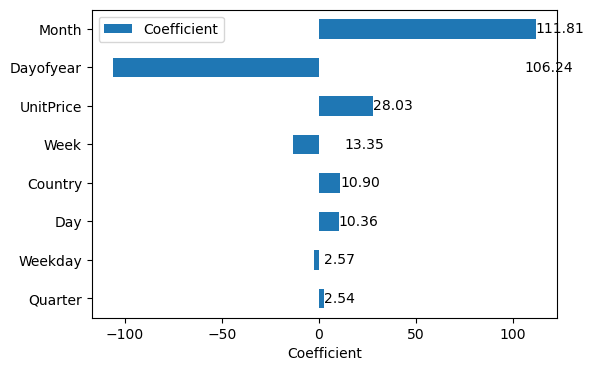

In [101]:
# column names for the input data matrix used for training

feature_names = preprocessor.named_transformers_['target'].named_steps['t_enc'].get_feature_names_out()\
            + ['UnitPrice']

# coefficients of the Linear Regression model
coefficients = pipe_lr.named_steps['lr'].coef_

# Creatinh a DataFrame to store the coefficients and their names
coef_df = pd.DataFrame({'Name': feature_names, 'Coefficient': coefficients})

# Printing the DataFrame sorted by absolute coefficient value
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

ax = coef_df.plot.barh(x='Name', y='Coefficient', figsize=(6,4))
ax.set_xlabel('Coefficient')
ax.set_ylabel(None)
ax.invert_yaxis()

# Adding absolute values as data labels
for i, coeff in enumerate(coef_df['Abs_Coefficient']):
    ax.text(coeff, i, f'{coeff:.2f}', ha='left', va='center')

plt.show()


# B. XGBoost

In [123]:
xgb_params = {
    'objective': 'reg:squarederror',  
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 100
}



## Model pipeline that works on training set and perfrom the steps mentioned in pipeline in order
pipe_xgb = Pipeline(steps=[
    ('encoding',preprocessor),
    ('scaler',MinMaxScaler()),
    ('xgb',xgb.XGBRegressor(**xgb_params)),
])

In [124]:
## fit pipeline on val set
pipe_xgb.fit(X_train,y_train)
y_pred_xgb = pipe_xgb.predict(X_val)

val_mse_xgb = mean_squared_error(y_val, y_pred_xgb)
val_rmse_xgb = np.sqrt(val_mse_xgb)
val_mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

## fit pipeline on Train set
y_train_pred_xgb = pipe_xgb.predict(X_train)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_rmse_xgb = np.sqrt(train_mse_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)


## Bias check
print("Train MSE: {:.3f}".format(train_mse_xgb))
print("Train RMSE: {:.3f}".format(train_rmse_xgb))
print("Train MAE: {:.3f}".format(train_mae_xgb))
print("Val MSE: {:.3f}".format(val_mse_xgb))
print("Val RMSE: {:.3f}".format(val_rmse_xgb))
print("Val MAE: {:.3f}".format(val_mae_xgb))

Train MSE: 108.501
Train RMSE: 10.416
Train MAE: 6.835
Val MSE: 141.395
Val RMSE: 11.891
Val MAE: 7.793


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


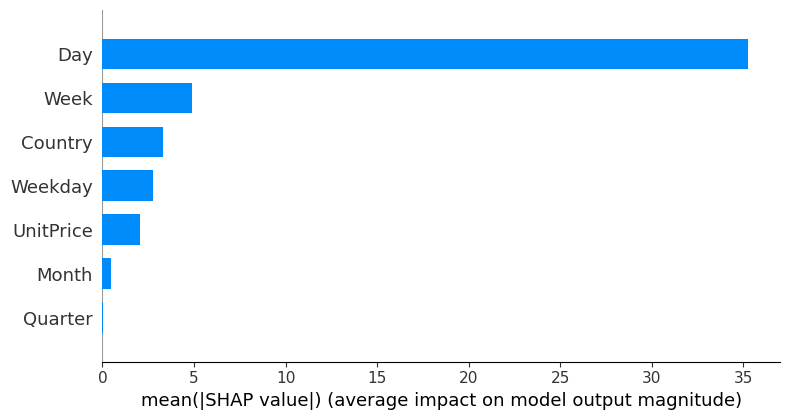

In [127]:
shap.initjs() 

#set the tree explainer as the model of the pipeline
explainer = shap.TreeExplainer(pipe_xgb['xgb'])

#apply the preprocessing to x_test
observations = preprocessor.transform(X_test)

#get Shap values from preprocessed data
shap_values = explainer.shap_values(observations)

#plot the feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


### Feature Importances

In [128]:
feature_names = preprocessor.named_transformers_['target'].named_steps['t_enc'].get_feature_names_out()\
            + ['UnitPrice']

# Getting the feature importances
importances = pipe_xgb.named_steps['xgb'].feature_importances_

# Zipping feature names and importances, and sort by importance
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Converting feature importances to a Pandas Series
feature_importances_xgb = pd.Series(
    [importance for importance, feature in feature_importances],
    index=[feature for importance, feature in feature_importances],
    name='Feature Importance'
)

# Printing feature importances
print(feature_importances_xgb)

UnitPrice    0.518325
Weekday      0.141708
Quarter      0.120091
Country      0.091964
Week         0.053754
Day          0.037338
Month        0.036821
Name: Feature Importance, dtype: float32


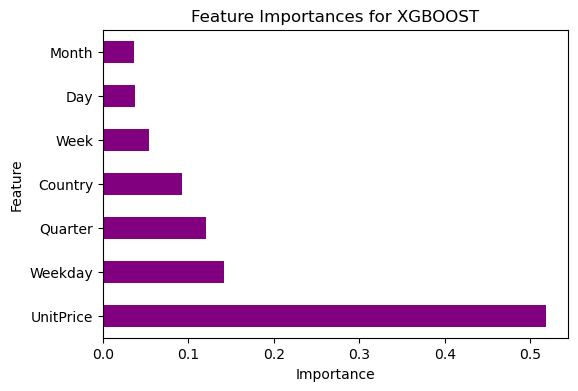

In [129]:
feature_importances_xgb.plot(kind='barh', figsize=(6, 4),color =['#800080'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for XGBOOST')
plt.show()

# C. CatBoost

In [106]:
# defining the hyperparameters
cb_params = {
    'loss_function': 'RMSE', 
    'learning_rate': 0.1,
    'depth': 5,
    'l2_leaf_reg': 10,
    'iterations': 100
}



## Model pipeline that works on training set and perfrom the steps mentioned in pipeline in order
pipe_cb = Pipeline(steps=[
    ('encoding',preprocessor),
    ('scaler',MinMaxScaler()),
    ('cb',cb.CatBoostRegressor(**cb_params)),
])

In [107]:
## fit pipeline on val set
pipe_cb.fit(X_train,y_train)
y_pred_cb = pipe_cb.predict(X_val)

val_mse_cb = mean_squared_error(y_val, y_pred_cb)
val_rmse_cb = np.sqrt(val_mse_cb)
val_mae_cb = mean_absolute_error(y_val, y_pred_cb)

## fit pipeline on Train set
y_train_pred_cb = pipe_cb.predict(X_train)

train_mse_cb = mean_squared_error(y_train, y_train_pred_cb)
train_rmse_cb = np.sqrt(train_mse_cb)
train_mae_cb = mean_absolute_error(y_train, y_train_pred_cb)


## Bias check
print("Train MSE: {:.3f}".format(train_mse_cb))
print("Train RMSE: {:.3f}".format(train_rmse_cb))
print("Train MAE: {:.3f}".format(train_mae_cb))
print("Val MSE: {:.3f}".format(val_mse_cb))
print("Val RMSE: {:.3f}".format(val_rmse_cb))
print("Val MAE: {:.3f}".format(val_mae_cb))

0:	learn: 12.6697588	total: 64.6ms	remaining: 6.4s
1:	learn: 12.5992555	total: 69.3ms	remaining: 3.4s
2:	learn: 12.5397057	total: 74ms	remaining: 2.39s
3:	learn: 12.4916786	total: 78.6ms	remaining: 1.89s
4:	learn: 12.4521689	total: 83.1ms	remaining: 1.58s
5:	learn: 12.4179353	total: 87.8ms	remaining: 1.38s
6:	learn: 12.3836988	total: 92.2ms	remaining: 1.22s
7:	learn: 12.3586470	total: 96.3ms	remaining: 1.11s
8:	learn: 12.3300922	total: 101ms	remaining: 1.02s
9:	learn: 12.3111972	total: 105ms	remaining: 945ms
10:	learn: 12.2952927	total: 109ms	remaining: 885ms
11:	learn: 12.2817847	total: 113ms	remaining: 832ms
12:	learn: 12.2675292	total: 118ms	remaining: 788ms
13:	learn: 12.2376552	total: 122ms	remaining: 752ms
14:	learn: 12.2188622	total: 126ms	remaining: 716ms
15:	learn: 12.2077737	total: 131ms	remaining: 685ms
16:	learn: 12.1810511	total: 135ms	remaining: 660ms
17:	learn: 12.1591541	total: 139ms	remaining: 635ms
18:	learn: 12.1528330	total: 143ms	remaining: 611ms
19:	learn: 12.1393

### Feature Importances

In [110]:
feature_names = preprocessor.named_transformers_['target'].named_steps['t_enc'].get_feature_names_out()\
            + ['UnitPrice']

# Getting the feature importances
importances_cb = pipe_cb.named_steps['cb'].feature_importances_

# Zipping feature names and importances, and sort by importance
feature_importances_cb = sorted(zip(importances_cb, feature_names), reverse=True)

# Converting feature importances to a Pandas Series
feature_importances_cb = pd.Series(
    [importance for importance, feature in feature_importances_cb],
    index=[feature for importances_cb, feature in feature_importances_cb],
    name='Feature Importance'
)

# Printing feature importances
print(feature_importances_cb)

UnitPrice    87.250687
Weekday       4.490098
Country       3.728216
Dayofyear     1.727892
Week          1.098611
Month         0.680944
Day           0.520685
Quarter       0.502866
Name: Feature Importance, dtype: float64


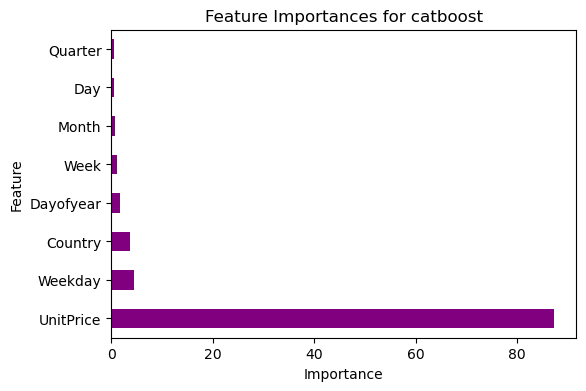

In [111]:
feature_importances_cb.plot(kind='barh', figsize=(6, 4),color =['#800080'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for catboost')
plt.show()

# D. Baseline Model Metric Evaluation 
- (Linear Regression, XGBoost, CatBoost)

In [112]:
# Defining pipelines
pipelines = {
    'Linear Regression': pipe_lr,
    'XGBoost': pipe_xgb,
    'CatBoost': pipe_cb
}
# Defining the metrics track
metrics = ['train_rmse', 'train_mae', 'train_mse', 'val_rmse', 'val_mae', 'val_mse']

# empty list to store the metric dictionaries
metric_dicts = []

# For loop to Train and evaluate each algorithm
for algo_name, pipeline in pipelines.items():
    
    ## Fitting the model 
    pipeline.fit(X_train,y_train)
    
    # Making predictions on the training
    y_train_pred = pipeline.predict(X_train)
    
    # Making predictions on the validation data
    y_val_pred = pipeline.predict(X_val)

    # Calculating the metrics for the training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Calculating the metrics for the validation data
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    
    # Creating a dictionary to store the metrics for this algorithm
    metric_dict = {'Algorithm': algo_name, 'train_mse':round(train_mse,2),'val_mse': round(val_mse,2),
                   'train_rmse':round(train_rmse,2),'val_rmse':round(val_rmse,2),
                   'train_mae':round(train_mae,2), 'val_mae':round(val_mae,2)}
    
    # Appending the dictionary to the list
    metric_dicts.append(metric_dict)

# Pivot the DataFrame
baseline_metrics_df = pd.DataFrame(metric_dicts)


0:	learn: 12.6697588	total: 7.77ms	remaining: 769ms
1:	learn: 12.5992555	total: 13ms	remaining: 639ms
2:	learn: 12.5397057	total: 19.3ms	remaining: 625ms
3:	learn: 12.4916786	total: 27.8ms	remaining: 668ms
4:	learn: 12.4521689	total: 34.1ms	remaining: 647ms
5:	learn: 12.4179353	total: 39.8ms	remaining: 623ms
6:	learn: 12.3836988	total: 46.8ms	remaining: 622ms
7:	learn: 12.3586470	total: 52.6ms	remaining: 605ms
8:	learn: 12.3300922	total: 59.1ms	remaining: 597ms
9:	learn: 12.3111972	total: 64.7ms	remaining: 583ms
10:	learn: 12.2952927	total: 70.2ms	remaining: 568ms
11:	learn: 12.2817847	total: 76.6ms	remaining: 562ms
12:	learn: 12.2675292	total: 81.7ms	remaining: 547ms
13:	learn: 12.2376552	total: 87ms	remaining: 535ms
14:	learn: 12.2188622	total: 91.9ms	remaining: 521ms
15:	learn: 12.2077737	total: 97.4ms	remaining: 511ms
16:	learn: 12.1810511	total: 103ms	remaining: 504ms
17:	learn: 12.1591541	total: 108ms	remaining: 494ms
18:	learn: 12.1528330	total: 113ms	remaining: 483ms
19:	learn:

In [113]:
baseline_metrics_df

Algorithm   train_mse     val_mse  train_rmse   val_rmse  \
0  Linear Regression  160.720385  190.119842   12.677554  13.788395   
1            XGBoost  108.152219  140.622892   10.399626  11.858452   
2           CatBoost  129.702597  159.523067   11.388705  12.630244   

   train_mae   val_mae  
0   8.751486  9.319942  
1   6.856052  7.871481  
2   7.518781  8.320755

### Analysis from Baseline models

- The XGBoost and CatBoost algorithms are better choices than Linear Regression for time-series sales forecasting, based on the metrics shown in the table.

- For all three algorithms, the validation metrics (val_mse, val_rmse, and val_mae) are lower than the corresponding training metrics (train_mse, train_rmse, and train_mae), which suggests that the models are not overfitting, but we can tru cross validation for further analysis.

- The XGBoost algorithm has the lowest validation metrics, which suggests that it is the best-performing model on the validation set. However, it is also possible that the XGBoost model might be overfitting to some extent.


#### Summary 

- The metrics alone don't provide a accurate answer about the models are overfitting or underfitting. However, the models appear to be performing reasonably well on both the training and validation sets.
    - Next Steps
        - we can use cross-validation or fit on our test data to better evaluate their performance.



# 2. Hyperparameter 
- GridsearchCV and timeseris split

In [98]:
sales_df.columns


Index(['InvoiceDate', 'Country', 'Quantity', 'UnitPrice', 'Quarter', 'Month',
       'Week', 'Weekday', 'Day', 'Dayofyear'],
      dtype='object')

In [99]:
X = sales_df.drop(['Quantity','InvoiceDate'],axis =1)
y = sales_df['Quantity']

In [100]:
## using Target Encoder for columns which has more unique values
target_pipeline = Pipeline([
    ('t_enc',TargetEncoder())
])

## For Non-Categorical Data
num_pipeline = Pipeline([
    ('no','passthrough')
])

## prepocessing pipeline that transformers column before fitting into model 
preprocessor = ColumnTransformer(
    transformers=[
        ('target',target_pipeline,['Country','Quarter','Month',
                                   'Week','Weekday','Day','Dayofyear']),
        ('num',num_pipeline,['UnitPrice'])
    ])

# Defining the parameter grid
xgb_param = {
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__min_child_weight': [3, 5, 7, 9],
}

# Defining the XGBregressor parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'random_state': 42
}

## Model pipeline that works on training set and perfrom the steps mentioned in pipeline in order
pipe_xgb = Pipeline(steps=[
    ('encoding',preprocessor),
    ('scaler',StandardScaler()),
    ('xgb',xgb.XGBRegressor(**xgb_params)),
])

tscv = TimeSeriesSplit(n_splits=3)

gs_xgb = GridSearchCV(pipe_xgb, xgb_param, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

gs_xgb.fit(X, y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('encoding',
                                        ColumnTransformer(transformers=[('target',
                                                                         Pipeline(steps=[('t_enc',
                                                                                          TargetEncoder())]),
                                                                         ['Country',
                                                                          'Quarter',
                                                                          'Month',
                                                                          'Week',
                                                                          'Weekday',
                                                                          'Day',
                                                                  

[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=3, xgb__n_estimators=300; total time=  25.2s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=7, xgb__n_estimators=300; total time=  41.2s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=5, xgb__n_estimators=300; total time=  36.6s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=7, xgb__n_estimators=200; total time= 1.2min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__n_estimators=200; total time= 1.1min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=7, xgb__n_estimators=100; total time=  16.9s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=7, xgb__n_estimators=200; total time=  31.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=9, xgb__n_estimators=100; total time=  27.1s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__

[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=3, xgb__n_estimators=100; total time=   8.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=300; total time=  26.7s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=9, xgb__n_estimators=200; total time=  28.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=5, xgb__n_estimators=200; total time=  18.4s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=7, xgb__n_estimators=100; total time=  31.3s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=7, xgb__n_estimators=300; total time= 1.1min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__n_estimators=200; total time= 1.6min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=7, xgb__n_estimators=300; total time= 1.3min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=9, xgb__

[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=100; total time=  12.6s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=7, xgb__n_estimators=100; total time=  14.4s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=9, xgb__n_estimators=100; total time=  13.9s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__n_estimators=100; total time=  24.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=5, xgb__n_estimators=200; total time= 1.2min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=9, xgb__n_estimators=200; total time=  44.6s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__n_estimators=300; total time= 1.6min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=7, xgb__n_estimators=300; total time= 2.0min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=9, xgb__

[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=3, xgb__n_estimators=100; total time=   3.8s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=200; total time=  17.3s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=7, xgb__n_estimators=200; total time=  27.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__n_estimators=200; total time=  35.1s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=7, xgb__n_estimators=100; total time=  43.1s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=9, xgb__n_estimators=100; total time=  34.5s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__n_estimators=100; total time=  49.9s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=5, xgb__n_estimators=200; total time=  32.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__

[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=3, xgb__n_estimators=200; total time=  25.7s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=9, xgb__n_estimators=100; total time=   4.8s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=9, xgb__n_estimators=200; total time=   9.0s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__n_estimators=100; total time=  15.3s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=5, xgb__n_estimators=100; total time=   8.6s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=5, xgb__n_estimators=200; total time=  49.1s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=7, xgb__n_estimators=300; total time=  33.9s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=9, xgb__n_estimators=300; total time=  33.7s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__

[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=3, xgb__n_estimators=200; total time=  16.5s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=7, xgb__n_estimators=200; total time=   9.2s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=9, xgb__n_estimators=100; total time=   9.4s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=3, xgb__min_child_weight=9, xgb__n_estimators=300; total time=  27.6s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=5, xgb__n_estimators=100; total time=  34.7s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=7, xgb__n_estimators=200; total time=  49.3s
[CV] END xgb__learning_rate=0.1, xgb__max_depth=5, xgb__min_child_weight=9, xgb__n_estimators=300; total time= 1.1min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=5, xgb__n_estimators=200; total time= 1.5min
[CV] END xgb__learning_rate=0.1, xgb__max_depth=7, xgb__

In [120]:
gs_xgb.best_params_

{'xgb__learning_rate': 0.1,
 'xgb__max_depth': 7,
 'xgb__min_child_weight': 5,
 'xgb__n_estimators': 300}

In [102]:
best_model_xgb = gs_xgb.best_estimator_

y_pred_gs_xgb = best_model_xgb.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred_gs_xgb)
test_rmse = mean_squared_error(y_test, y_pred_gs_xgb, squared=False)
test_mae = mean_absolute_error(y_test, y_pred_gs_xgb)

In [103]:
train_pred_gs_xgb = best_model_xgb.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred_gs_xgb)
train_rmse = mean_squared_error(y_train, train_pred_gs_xgb, squared=False)
train_mae = mean_absolute_error(y_train, train_pred_gs_xgb)

In [104]:
print("Test MSE: ", test_mse)
print("Test RMSE: ", test_rmse)
print("Test MAE: ", test_mae)

print("Train MSE: ", train_mse)
print("Train RMSE: ", train_rmse)
print("Train MAE: ", train_mae)

Test MSE:  127.24551565261854
Test RMSE:  11.280315405724192
Test MAE:  7.298030888829773
Train MSE:  84.55111651048345
Train RMSE:  9.195168106700576
Train MAE:  6.019097492028726


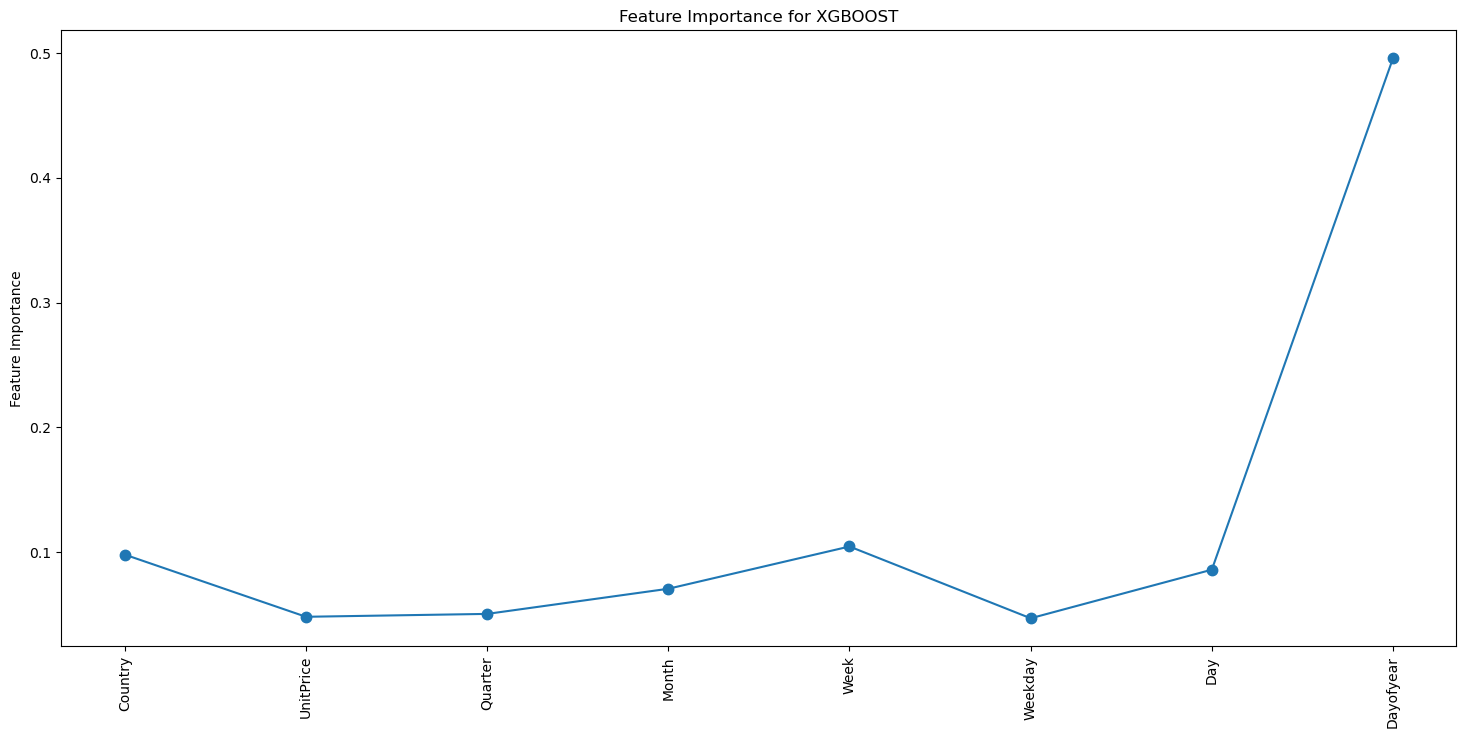

In [105]:
# Getting the XGBRegressor estimator from the pipeline
xgb_estimator = gs_xgb.best_estimator_.named_steps['xgb']

fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(xgb_estimator.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(xgb_estimator.feature_importances_)), X_train.columns, rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for XGBOOST')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


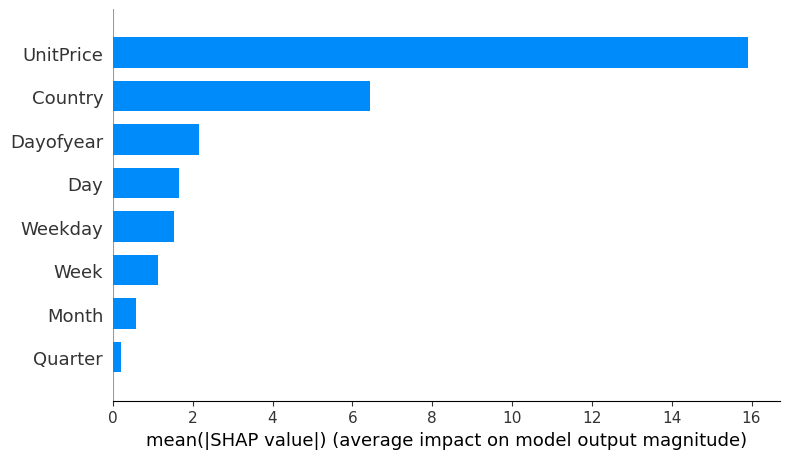

In [113]:
feature_names = preprocessor.named_transformers_['target'].named_steps['t_enc'].get_feature_names_out()\
            + ['UnitPrice']

# Extracting the best estimator from GridSearchCV
best_estimator = gs_xgb.best_estimator_

# Initializing a SHAP explainer object for the XGBoost model
explainer = shap.TreeExplainer(best_estimator['xgb'])

# Applying the preprocessor to the test set
preprocessor.fit(X,y)
X_test_preprocessed = preprocessor.transform(X_test)

# Compute the SHAP values for the test set
shap_values = explainer.shap_values(X_test_preprocessed)

# Plotting
shap.summary_plot(shap_values, X_test_preprocessed,feature_names=feature_names, plot_type="bar")

### Comparing 2 Model interpretation


- XGBoost
    - shows that the day, week and country play significant role in predicting sales
- XGBoostRegressor 
    - shows that unitPrice, country and dayofyear
    
- it seems that dayofyear or unitprice Might be causing data leakage as the feature importance and impact value is much higher than rest 



## Summary from GSCV XGBOOST

- The results XGBoost model with the selected preprocessing pipeline and hyperparameters may be overfitting to the training data

- It seems like ite been overfitting due to day of year column/feature 

- For futher nalysis, additional steps may be necessary to address overfitting, for e.g,. using a simpler model or adding regularization,Or more advanced techniques like ensembling, stacking or using LSTM neural networks cmight  improve the performance of the model.

# 3. Stacking

In [19]:
# Splitting the data into training and testing sets
X = sales_df.drop(['Quantity','InvoiceDate','Dayofyear'],axis =1)
y = sales_df['Quantity']

In [24]:
## using Target Encoder for columns which has more unique values
target_pipeline = Pipeline([
    ('t_enc',TargetEncoder())
])

## For Non-Categorical Data
num_pipeline = Pipeline([
    ('no','passthrough')
])

## prepocessing pipeline that transformers column before fitting into model 
preprocessor = ColumnTransformer(
    transformers=[
        ('target',target_pipeline,['Country','Quarter','Month',
                                   'Week','Weekday','Day']),
        ('num',num_pipeline,['UnitPrice'])
    ])


# parameter grid for GradientBoostingRegressor
param_gbr = {
#     'n_estimators': [50,100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# parameter grid for XGBRegressor
param_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

param_list = {
    'stacking__gbr__max_depth': [3, 5, 7],
    'stacking__gbr__learning_rate': [0.01, 0.1],
    'stacking__xgb__max_depth': [3, 5, 7],
    'stacking__xgb__learning_rate': [0.01, 0.1]
}

estimators = [
    ('gbr', GradientBoostingRegressor(**param_gbr)),
    ('xgb', XGBRegressor(**param_xgb)),
    ('lr', LinearRegression())
]


# Defining the pipeline
stack_pipeline = Pipeline([
    ('encoding',preprocessor),
    ('scaler',StandardScaler()),
    ('stacking', StackingRegressor(
        estimators=estimators,
        final_estimator=LinearRegression()
    ))
])

tscv = TimeSeriesSplit(n_splits=3)

# GridSearchCV 
gs_stack = GridSearchCV(estimator=stack_pipeline, param_grid=param_list,cv=tscv,n_jobs=-1,scoring='neg_mean_squared_error',verbose=2)

# fitting GSCV to the data
gs_stack.fit(X, y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 

In [170]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [168]:
gs_stack.best_params_

{'stacking__gbr__learning_rate': 0.01,
 'stacking__gbr__max_depth': 3,
 'stacking__gbr__n_estimators': 50}

## Took Too long to run as stacking is very much time and computation power consuming 


# 4. LSTM 
- Deep Learning Model

In [11]:
sales_df['Country'] = sales_df['Country'].astype('category')
sales_df['Quarter'] = sales_df['Quarter'].astype('category')
sales_df['Month'] = sales_df['Month'].astype('category')
sales_df['Week'] = sales_df['Week'].astype('category')
sales_df['Weekday'] = sales_df['Weekday'].astype('category')
sales_df['Day'] = sales_df['Day'].astype('category')

In [12]:
# Splitting the dataset into train and test dataset

df_train = sales_df.loc[sales_df['InvoiceDate']<'2011-09-01']
df_test = sales_df.loc[sales_df['InvoiceDate']>='2011-09-01']


# Preparing the data
X_train, y_train = df_train.drop(['InvoiceDate','Quantity','Dayofyear'], axis=1), df_train['Quantity']
X_test, y_test = df_test.drop(['InvoiceDate','Quantity','Dayofyear'], axis=1), df_test['Quantity']

In [13]:
# define the look_back and batch_size
look_back = 7
batch_size = 32

# encode categorical columns
te = TargetEncoder()
X_train[['Country','Quarter','Month','Week','Weekday','Day']] = te.fit_transform(X_train[['Country','Quarter','Month','Week','Weekday','Day']], y_train)
X_test[['Country','Quarter','Month','Week','Weekday','Day']] = te.transform(X_test[['Country','Quarter','Month','Week','Weekday','Day']])

# scale numerical column
scaler = MinMaxScaler()
X_train['UnitPrice'] = scaler.fit_transform(X_train[['UnitPrice']])
X_test['UnitPrice'] = scaler.transform(X_test[['UnitPrice']])

num_feature_input = len(X_train.columns)
history_input = 30


# create train and test generators using TimeseriesGenerator
train_data_generator = TimeseriesGenerator(X_train.values, y_train.values, length=history_input, batch_size=batch_size)
test_data_generator = TimeseriesGenerator(X_test.values, y_test.values, length=history_input, batch_size=batch_size)


# Defining the model architecture
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (history_input, num_feature_input))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 50,  activation='relu', return_sequences = True))                                    
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation = "linear"))    
    

2023-04-14 02:07:04.155320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:07:04.156380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 02:07:04.157495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [15]:
# Compiling the model
# Adjusting the learning rate as needed
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  
model.compile(optimizer= optimizer, loss='mean_squared_error', metrics=['mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Fit the model using the generator
history = model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=100, validation_data=test_data_generator, callbacks=[early_stopping])


Epoch 1/100


2023-04-14 02:09:20.796102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-14 02:09:21.172737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:09:21.173946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

4480/4482 [============================>.] - ETA: 0s - loss: 165.1965 - accuracy: 0.1279

2023-04-14 02:10:51.870073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-14 02:10:52.211963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:10:52.213272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

4482/4482 [==============================] - 110s 24ms/step - loss: 165.1923 - accuracy: 0.1279 - val_loss: 233.4547 - val_accuracy: 0.1309
Epoch 2/100
4482/4482 [==============================] - 123s 27ms/step - loss: 163.4643 - accuracy: 0.1279 - val_loss: 233.9131 - val_accuracy: 0.1309
Epoch 3/100
4482/4482 [==============================] - 125s 28ms/step - loss: 163.2439 - accuracy: 0.1279 - val_loss: 232.0327 - val_accuracy: 0.1309
Epoch 4/100
4482/4482 [==============================] - 126s 28ms/step - loss: 163.1242 - accuracy: 0.1279 - val_loss: 233.5071 - val_accuracy: 0.1309
Epoch 5/100
4482/4482 [==============================] - 128s 28ms/step - loss: 163.1623 - accuracy: 0.1279 - val_loss: 234.4963 - val_accuracy: 0.1309
Epoch 6/100
4482/4482 [==============================] - 122s 27ms/step - loss: 163.1990 - accuracy: 0.1279 - val_loss: 233.2695 - val_accuracy: 0.1309
Epoch 7/100
4482/4482 [==============================] - 125s 28ms/step - loss: 163.0790 - accuracy:

In [ ]:
predictions = []
for i in range(len(future_data_generator)):
    sequence = future_data_generator[i][0]
    prediction = model.predict(sequence)
    predictions.append(prediction)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_values = y_test[history_input:].values
predicted_values = np.array(predictions).flatten()

mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

In [ ]:
mse_list = []
mae_list = []

for i in range(len(future_data_generator)):
    sequence = future_data_generator[i][0]
    prediction = model.predict(sequence).flatten()  # Flatten the prediction to match the shape of actual_values
    actual_values_seq = y_test[history_input + i:history_input + i + len(sequence)]  # Get corresponding actual values
    mse_seq = mean_squared_error(actual_values_seq, prediction)
    mae_seq = mean_absolute_error(actual_values_seq, prediction)
    mse_list.append(mse_seq)
    mae_list.append(mae_seq)

# Calculate the mean MSE and MAE across all sequences
mse = np.mean(mse_list)
mae = np.mean(mae_list)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

In [ ]:
Mean Squared Error (MSE): 197.57190729997382
Mean Absolute Error (MAE): 9.261607850696787

Mean Squared Error (MSE): 
   - MSE measures the average of the squared differences between the predicted values and the actual values. In your case, the MSE of approximately 197.57 means that, on average, the squared difference between your model's predictions and the actual values is 197.57.
   - A lower MSE indicates better model performance. Smaller MSE values mean that the model's predictions are closer to the actual values.
   - The MSE is sensitive to outliers, as it squares the errors. Large errors will contribute significantly to the MSE.

Mean Absolute Error (MAE): 
   - MAE measures the average of the absolute differences between the predicted values and the actual values. Your MAE of approximately 9.26 means that, on average, the absolute difference between your model's predictions and the actual values is 9.26.
   - MAE is also a measure of prediction accuracy, but it is less sensitive to outliers compared to MSE since it doesn't square the errors.
   - Like MSE, a lower MAE indicates better model performance. Smaller MAE values mean that the model's predictions are closer to the actual values.


     - In summary, an MSE of 197.57 and an MAE of 9.26 suggest that your LSTM model has some degree of prediction error when forecasting future sales. The specific interpretation of these values can vary depending on the context of your data and the problem you are trying to solve. It's essential to consider domain knowledge and the specific goals of your forecasting task when assessing whether these errors are acceptable or if further model improvement is needed.

# 5. Interpretation of Final Model
FINAL_MODEL. ------>>>>>>  [XGBoost](#B.-XGBoost)

#### Chossign XGBoost 
- Easy and fast to use
- easy to interpret the model
- Hyperparameter tuning saves data from overfitting

### Interpretation:- 
- it's not surprising that day(of month), week  and country has most impact on our model

- Businesses can use this insight and make ipactful decision for promotion or country based personalized products which can attract customers and so sales 

- Different days of the month and week may correspond to different paydays or events that affect consumer behavior, and different countries may have unique cultural or economic factors that influence buying habits.

# 6. Model Optimization and Next Steps

- Quality Data:
    - Historical sales data: 
        - more past sales data for the same or similar products or services, to identify trends, seasonal patterns, and other factors that might afcte future sales.
        
    - Economic data: 
        - such as GDP, inflation, interest rates, and consumer confidence, which can impact consumer spending behavior and sales.
        
    - Demographic data: 
        - such as age, gender, and location, which can help identify customer preferences and behavior, to target internatonal cutsomers new product can be lauched based on prefrences of demographic

    - Promotional data: 
        - This idata might have huge impact as on promotions such as product discounts, coupons, and special offers, which can influence customer purchasing behavior and thus sales.
    - Product data: 
        - price, quality, features, and availability
        -Using NLP for description of products,help identify trends in colors, styles, and features of the products. This can help in understanding the preferences of the customers and the market trends for the different types of products.

- Timeseries analysis Model
     - mlforecast
         - lag, rollin window
     - Traditionl popular techniques such as ARMIA,Prophet...
- Hyperparameter tuning 
    - with more coputation power we can use stacking with hyperparameter tuning
- Deep learning models
    - WE have used LSTM Long Term Short Term Memory (RNN)  
    
   

# 7. Conclusion

- Sales forecasting methods can be debatable  and is a complex process that requires domain expertise and a detailed understanding of the business and its industry.

- It can helps businesses to plan, make informed decisions, and manage their operations effectively and enable them to optimize their inventory, production, marketing, and other aspects of their operations and maintain profitability over the long term.

- By analyzing historical sales data and other relevant factors, businesses can develop accurate sales forecasts that allow them to identify and reduce potential risks and capitalize on opportunities. 


# 8. Model Related Answers

- what sort of models were used?
    - XGBoost,
    - CatBoost, 
    - stacking(XGBregressor, GradientBoostingRegressor) cell didn't execute fully due to computation power and time consuption
    - LSTM(RNN) -- New to this quite complicated to interpret the model
    
- why these models?
    - XGBoost and CatBoost, LSTM are popular machine learning algorithms and RNN for sales forecasting they can handle large datasets, capture non-linear relationships, and handle missing values effectively, resulting in better predictions than other models.
    
    - Also stacking can help reduce overfting and improve the model overall by combining predictions from models that have been trained on different hyperparameters.(but using grid search for stacking could take alot of computation time and power)
    
- Why mse,rmse, mae metrics?
    -  These metrics are used to measure the difference between the actual target values and the predicted values generated by the regression model
    
    
- how rigorous was exploratory analysis of the data?
    - EDA is mostly based on time dependant sales to look for time related patterns(seasonal, cyclic, festival)
    